In [1]:
import re
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [15]:
def smooth_loss(losses, smoothing_factor=0.2):
    smoothed_losses = []
    last = losses[0]
    
    for loss in losses:
        smoothed_loss = last * smoothing_factor + (1 - smoothing_factor) * loss
        smoothed_losses.append(smoothed_loss)
        last = smoothed_loss
    
    return smoothed_losses

# Function to parse the log file and extract step and loss values
def parse_log_file(file_path):
    steps = []
    losses = []

    # Regular expression to extract step and loss from each line
    pattern = r"Step \[(\d+)\], Epoch \[\d+/\d+\], Loss: ([\d.]+),"
    
    # Read the file
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                step = int(match.group(1))
                loss = float(match.group(2))
                steps.append(step)
                losses.append(loss)

    return steps, losses

def parse_and_plot_two_logs(file_path1, file_path2, smoothing_factor=0.9):
    # Parse both log files
    steps1, losses1 = parse_log_file(file_path1)
    steps2, losses2 = parse_log_file(file_path2)
    
    # Smooth the loss values
    smoothed_losses1 = smooth_loss(losses1, smoothing_factor)
    smoothed_losses2 = smooth_loss(losses2, smoothing_factor)
    
    # Plot the results for both logs on the same graph
    plt.figure(figsize=(10, 6))
    
    # First file plot
    plt.plot(steps1, smoothed_losses1, marker='o', markersize=1, linestyle='-', color='b', label=f'File 1: {file_path1}')
    
    # Second file plot
    plt.plot(steps2, smoothed_losses2, marker='o', markersize=1, linestyle='-', color='r', label=f'File 2: {file_path2}')
    
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Loss vs Step (Two Log Files)')
    plt.legend()
    plt.grid(True)
    plt.show()


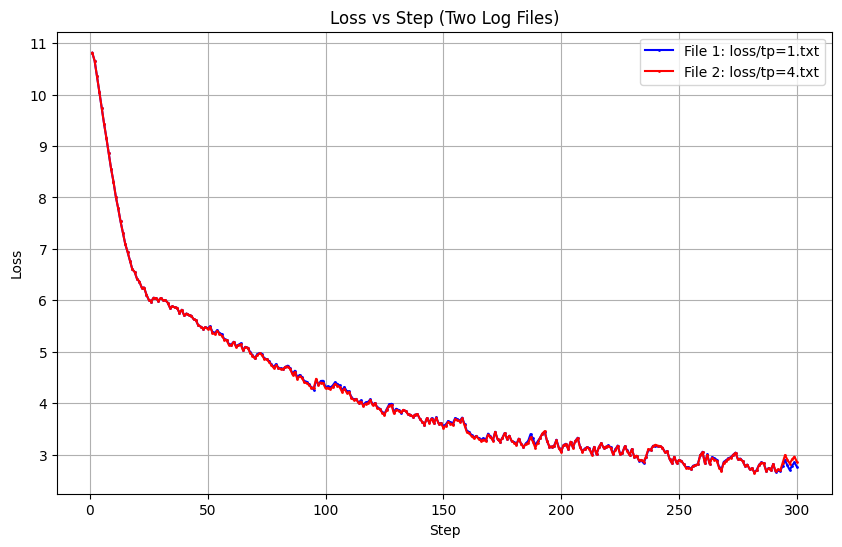

In [17]:
# Assuming you provide the file path (you can modify the path accordingly)
file_path1 = 'loss/tp=1.txt'
file_path2 = 'loss/tp=4.txt'
parse_and_plot_two_logs(file_path1=file_path1, file_path2=file_path2, smoothing_factor= 0.5)